# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [182]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].unique()
mice_count = len(unique_mice)
mice_count

249

In [183]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"])]

In [184]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [185]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_df.loc[merged_df["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [186]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [187]:
summary_stat = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_stat

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stat = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_stat = summary_stat[["mean", "std"]]
summary_stat["var"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stat["median"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stat["sem"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stat = summary_stat[["mean", "median","var", "std","sem"]]
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [189]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

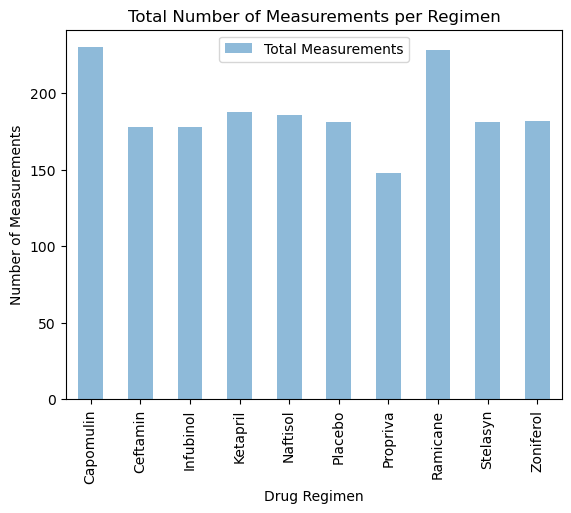

In [190]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group = clean_data.groupby("Drug Regimen").count()
pandas_bar = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()

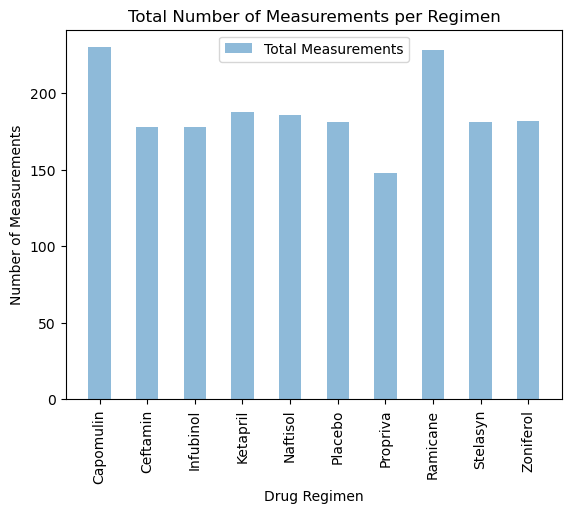

In [191]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
tick_locations = [x *1.7 for x in x_axis]
plt.bar(tick_locations, pandas_bar["Total Measurements"], alpha = .5, align = "center", label = "Total Measurements")
plt.xticks(tick_locations, regimen_group.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc = "best")
plt.show()


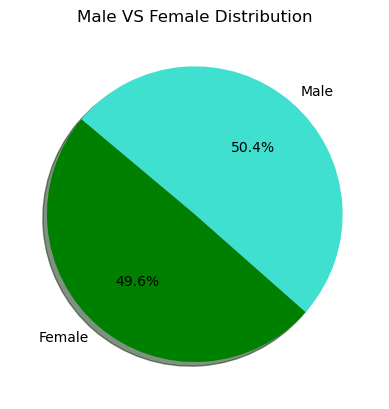

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
sex_df = sex_df["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

colors = ["green", "turquoise"]
sex_df.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution",autopct="%1.1f%%", shadow=True, startangle=140, colors = colors, legend = False).yaxis.set_visible(False)



Text(0.5, 1.0, 'Male VS Female Distribution')

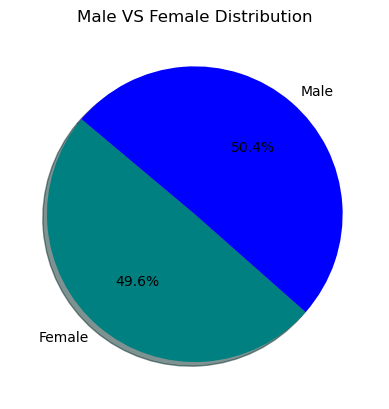

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

males = sex_df.loc["Male", "Total"]
females = sex_df.loc["Female", "Total"]

labels = sex_df.index
colors = ["teal", "blue"]
sizes = [females, males]
plt.pie(sizes,labels=labels, colors = colors,
      autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male VS Female Distribution")

## Quartiles, Outliers and Boxplots

In [194]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
copy_clean = pd.DataFrame.copy(clean_data)
four_drugs = clean_data.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
four_drugs = four_drugs.groupby("Mouse ID")["Timepoint"].max()
four_drugs = pd.DataFrame(four_drugs).reset_index()


new_merged = pd.merge(copy_clean, four_drugs, on = ["Timepoint", "Mouse ID"])
new_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [195]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = new_merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"lower quartile is {lowerq}")
print(f"Upper quartile is {upperq}")
print(f"IQR is {IQR}")
   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in new_merged.iterrows():
        if row["Drug Regimen"] == treatment:
            tumor_list.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(tumor_list)
    
    # add subset 
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
    
    # Determine outliers using upper and lower bounds
print(f"Upper outlier is {upper_bound}")
print(f"Lower outlier is {lower_bound}")

lower quartile is 37.1877438025
Upper quartile is 59.930261755
IQR is 22.742517952499995
Upper outlier is 94.04403868374999
Lower outlier is 3.0739668737500097


Text(0.5, 1.0, 'Variability of Top 4 Drug Regiments')

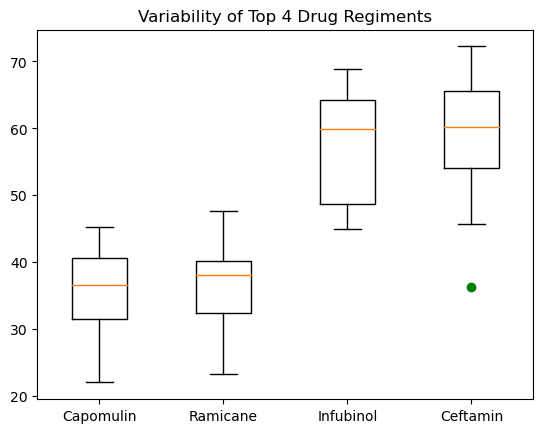

In [196]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels = treatments, sym = "green")
plt.title("Variability of Top 4 Drug Regiments")


## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

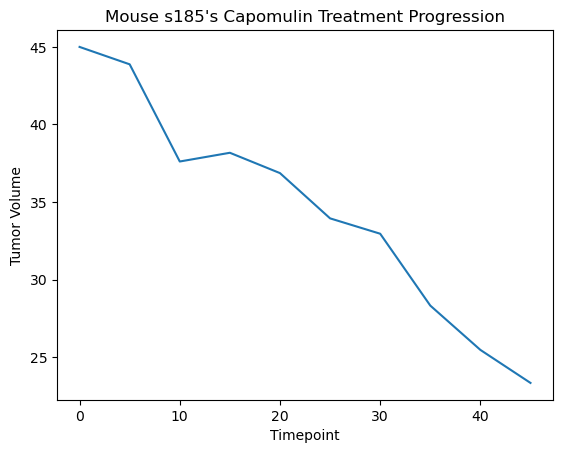

In [197]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].loc[clean_data["Mouse ID"] == "s185"]

lx_axis = s185["Timepoint"].tolist()
ly_axis = s185["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")
lx_axis


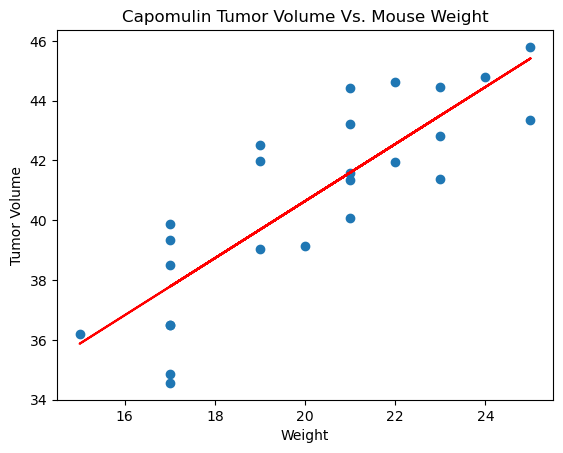

In [198]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = Capomulin_weight["Weight (g)"]
sy_axis = Capomulin_weight["Tumor Volume (mm3)"]


correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis,sy_axis)
plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")


## Correlation and Regression

In [199]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")


The correlation between both factors is 0.84
Linear Regressions Model: y = 0.95x + 21.55
